## Progress Report & Next Steps

**Last Updated:** January 29, 2025

### Progress Made
- ✅ Notebook structure created with 31 cells
- ✅ All three model classes implemented:
  - `VGGNet_BN` - Baseline with standard BatchNorm
  - `VGGNet_NoisyBN` - Noisy version with forced ICS
  - `VGGNet_NoBN` - Control without BatchNorm
- ✅ Fixed PRNG key issue (Option 1 implementation):
  - `NoisyVGGBlock` uses `master_noise_key` split during forward pass
  - Noise only applied during training, disabled during evaluation
- ✅ Training loop with all three models simultaneously
- ✅ Real-time visualization (loss, train/test accuracy)
- ✅ Results visualization and analysis code
- ✅ Automated hypothesis testing
- ✅ Validation and debugging checks

### Current Configuration
- Dataset: CIFAR-10 (no augmentation)
- Batch size: 128
- Architecture: VGG-style (10 conv + 3 FC layers)
- Learning rate: 0.035
- Momentum: 0.9
- Noise parameters: shift=1.0, scale=0.2
- Training epochs: 39
- Random seeds: 1337 (models), 1338 (noise)

### Status
- Notebook is complete and ready to execute
- All cells are syntactically valid
- No known bugs blocking execution

### Next Steps

**Phase 1: Initial Validation (DO THIS FIRST)**
1. Run dataset loading cell - verify CIFAR-10 loads correctly
2. Run model initialization cell - verify all three models initialize
3. Run validation cell - check output shapes and noise behavior
4. **STOP and verify all checks pass before proceeding**

**Phase 2: Short Training Run**
1. Modify `num_epochs = 3` (in training setup cell)
2. Run training loop - verify:
   - All models train without crashes
   - Loss decreases for all models
   - Accuracy improves
   - Visualizations work correctly
3. Check that noisy_bn produces different outputs on each call (stochastic)
4. Stop and analyze short results

**Phase 3: Full Experiment Execution**
1. Restore `num_epochs = 39`
2. Run full training loop (~6-8 hours expected)
3. Monitor for issues:
   - NaN losses or diverging
   - Out-of-memory errors
   - Training instability
   - Unexpected long runtimes
4. Wait for completion or interrupt early if needed

**Phase 4: Results Analysis**
1. Review final visualizations
2. Check if hypothesis is supported (|Baseline BN - Noisy BN| < 2%)
3. Document findings in analysis output
4. Consider next experiments if needed

### Expected Outcomes
- **If Santurkar et al hypothesis is correct:**
  - |Baseline BN - Noisy BN| < 2%
  - Both BN models >> Non-BN
  - This suggests BN effectiveness is independent of ICS reduction

- **If hypothesis is NOT supported:**
  - |Baseline BN - Noisy BN| > 2%
  - May indicate issues with noise implementation
  - May suggest ICS reduction plays a role

### Known Issues to Watch For
- Memory usage: 3 models simultaneously may be memory-intensive
- Training time: ~6-8 hours, be prepared to wait or run overnight
- Noise parameters: shift=1.0, scale=0.2 might need adjustment
- PRNG key state: Ensure keys are properly managed during long training

---
**Ready to proceed with Phase 1 (Initial Validation)?**

## References

### Papers

1. **Santurkar, S., Tsipras, D., Ilyas, A., & Madry, A. (2018).** [How does batch normalization help optimization?](https://arxiv.org/abs/1805.11604). NeurIPS 31.
   - Key finding: BN's effectiveness is independent of Internal Covariate Shift (ICS) reduction
   - Proposed mechanism: Loss landscape smoothing, gradient predictiveness, better initialization

2. **Ioffe, S., & Szegedy, C. (2015).** [Batch normalization: Accelerating deep network training by reducing internal covariate shift](https://arxiv.org/abs/1502.03167). ICML 2015.
   - Original ICS theory: BN reduces distributional shift in layer activations
   - This notebook tests Santurkar's claim that ICS reduction is not the causal mechanism

3. **Duchi, J., Hazan, E., Singer, Y., & Chandra, T. (2011).** [Adaptive Subgradient Methods for Online Learning and Stochastic Optimization](https://jmlr.org/papers/v12/duchi11a.html). JML 12(7):2121-2159.
   - Original Adagrad optimizer with adaptive learning rates based on gradient history
   - AdaGrad uses diagonal preconditioning - each dimension gets its own learning rate

4. **Zeiler, M. D. (2012).** [ADADELTA: An Adaptive Learning Rate Method](https://arxiv.org/abs/1212.5701). Technical report.
   - Introduced Adagrad with root mean squared propagation (RMSProp)
   - Uses exponential moving average instead of cumulative sum, solving AdaGrad's vanishing gradient problem

5. **Kingma, D. P., & Ba, J. (2015).** [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980). ICLR (2).
   - Combines momentum (RMSProp) with adaptive learning rates
   - Most widely used optimizer for deep learning

6. **Loshchilov, I., & Hutter, F. (2017).** [Decoupled Weight Decay Regularization](https://arxiv.org/abs/1711.05101). ICLR (3).
   - AdamW separates weight decay from adaptive learning rate for better regularization
   - Addresses Adam's weight decay issues

### Blog Posts & Tutorials

1. [How Does Batch Normalization Work? Part 1](https://blog.vikrampawar.com/how-batchnorm-works.html) - Initial BN introduction and Ioffe's ICS theory
2. [How Does Batch Normalization Work? Part 2](https://blog.vikrampawar.com/how-batchnorm-works-part-2.html) - Ioffe vs Santurkar comparison and landscape measurements

### Optimization Theory

1. [Preconditioning in Optimization](https://en.wikipedia.org/wiki/Preconditioning) - Mathematical foundation for rescaling the optimization problem
2. [Lipschitz Continuity](https://en.wikipedia.org/wiki/Lipschitz_continuity) - Smoothness properties of functions
3. [Gradient Descent Algorithms](https://en.wikipedia.org/wiki/Gradient_descent#Momentum) - Background on momentum methods

### Related Work

1. [How Does Batch Normalization Help Optimization? - Paper Analysis](https://arxiv.org/abs/1805.11604) - Santurkar et al paper with experiments
2. [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167) - Original Ioffe & Szegedy paper3. [Understanding the Failure of Batch Normalization for Transformers in NLP](https://arxiv.org/abs/2002.03388) - BN issues with sequence models
### Implementation Resources

1. [Flax Documentation](https://flax.readthedocs.io/en/latest/index.html) - Framework used for model implementation
2. [JAX Documentation](https://jax.readthedocs.io/en/latest/index.html) - Autograd and JIT compilation library
3. [Optax](https://optax.readthedocs.io/en/latest/index.html) - Optimization library with standard optimizers

### Tools & Libraries

1. [deepkit](https://github.com/novastar53/deepkit) - Custom utilities for experiments (datasets, loggers, metrics)
2. [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html) - Image classification dataset used in experiments3. [Matplotlib](https://matplotlib.org/) - Visualization library
4. [Seaborn](https://seaborn.pydata.org/) - Statistical data visualization (plotting style)

# BatchNorm Noise Injection Experiment

## Overview

This notebook replicates Santurkar et al (2018) experiment demonstrating that BatchNorm's effectiveness is independent of Internal Covariate Shift (ICS) reduction.

### Hypothesis

BatchNorm's benefits come from **structural smoothing of loss landscape**, not from reducing distributional ICS. If this is true:

- **Baseline BN** ≈ **Noisy BN** (similar performance)
- Both BN models >> **Non-BN** (significantly better)

### Experiment Design

1. **Baseline BN:** Standard VGG + BatchNorm
2. **Noisy BN:** VGG + BatchNorm with forced random shift/scale noise before BN normalization
3. **Non-BN:** VGG without BatchNorm

All models use identical:
- Architecture (10 conv layers + 3 FC layers)
- Initialization (same random seed)
- Hyperparameters (lr=0.035, momentum=0.9)
- Training conditions (39 epochs, CIFAR-10)

### Expected Results (Santurkar et al)

If ICS reduction is NOT causal mechanism:
- Noisy BN should achieve similar performance to Baseline BN despite forced high ICS
- Both BN models should significantly outperform Non-BN

### Reference

- Santurkar, S., Tsipras, D., Ilyas, A., & Madry, A. (2018). [How does batch normalization help optimization?](https://arxiv.org/abs/1805.11604). NeurIPS 31.

## Setup & Imports

Import all necessary libraries and configure plotting.

In [1]:
import jax
import jax.numpy as jnp
import flax.nnx as nnx
import optax
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
plt.style.use('seaborn-v0_8-darkgrid')
from deepkit.datasets import load_CIFAR10
%matplotlib inline

/root/high_performance_jax/.venv/lib/python3.12/site-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.8.1 is installed, but it is not compatible with the installed jaxlib version 0.8.0, so it will not be used.
  warnings.warn(


## Dataset Loading

Load CIFAR-10 dataset without augmentation.

In [2]:
train_loader, test_loader = load_CIFAR10(augment=False)
print(f"Train batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

100%|██████████| 170M/170M [00:07<00:00, 24.3MB/s] 


Train batches: 391
Test batches: 79


## Model Definitions

Define three model variants:
1. **Baseline BN:** Standard VGG block with BatchNorm
2. **Noisy BN:** VGG block with BatchNorm + forced noise before BN
3. **Non-BN:** VGG block without BatchNorm

### Baseline VGG Block (Standard BN)

Standard VGG block with BatchNorm after convolution.

In [3]:
kernel_init = nnx.initializers.glorot_normal()
class VGGBlock(nnx.Module):
    def __init__(self, in_features: int, out_features: int, rngs: nnx.Rngs):
        self.conv = nnx.Conv(
            in_features=in_features,
            out_features=out_features,
            kernel_size=(3, 3),
            kernel_init=kernel_init,
            padding='SAME',
            rngs=rngs
        )
        self.bn = nnx.BatchNorm(num_features=out_features, momentum=0.90, rngs=rngs)
    def __call__(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = nnx.relu(x)
        return x

### Noisy VGG Block (BN + Forced Noise)

Apply random shift and scale noise BEFORE BatchNorm normalization to forcibly increase ICS.

**Key Features:**
- Noise only applied during training (not evaluation)
- Per-batch random generation
- Structured noise: shift (additive) + scale (multiplicative)
- Parameters: `shift=1.0`, `scale=0.2`

In [4]:
class NoisyVGGBlock(nnx.Module):
    def __init__(
        self, 
        in_features: int, 
        out_features: int, 
        noise_shift: float = 1.0, 
        noise_scale: float = 0.2, 
        *, 
        rngs: nnx.Rngs
    ):
        self.conv = nnx.Conv(
            in_features=in_features,
            out_features=out_features,
            kernel_size=(3, 3), 
            kernel_init=kernel_init, 
            padding='SAME', 
            rngs=rngs
        )
        self.noise_shift = noise_shift
        self.noise_scale = noise_scale
        self.master_noise_key = nnx.Variable(jax.random.PRNGKey(0))
        self.bn = nnx.BatchNorm(num_features=out_features, momentum=0.90, rngs=rngs)
        self.training = True
    def __call__(self, x):
        x = self.conv(x)
        if self.training:
            key, subkey = jax.random.split(self.master_noise_key.value)
            self.master_noise_key.value = key
            shift = jax.random.uniform(
                subkey, x.shape, 
                minval=-self.noise_shift, 
                maxval=self.noise_shift
            )
            scale = jax.random.uniform(
                subkey, x.shape, 
                minval=1.0 - self.noise_scale, 
                maxval=1.0 + self.noise_scale
            )
            x = (x + shift) * scale
        x = self.bn(x)
        x = nnx.relu(x)
        return x

### Non-BN VGG Block

VGG block without BatchNorm (control for comparison).

In [5]:
class NoBNVGGBlock(nnx.Module):
    def __init__(self, in_features: int, out_features: int, rngs: nnx.Rngs):
        self.conv = nnx.Conv(
            in_features=in_features,
            out_features=out_features,
            kernel_size=(3, 3), 
            kernel_init=kernel_init, 
            padding='SAME', 
            rngs=rngs
        )
    def __call__(self, x):
        x = self.conv(x)
        x = nnx.relu(x)
        return x

### Full VGG Network Architectures

Three complete network architectures with identical structure.

In [6]:
# Baseline BN Network
class VGGNet_BN(nnx.Module):
    def __init__(self, rngs: nnx.Rngs):
        self.convs = [
            VGGBlock(in_features=3, out_features=64, rngs=rngs), 
            VGGBlock(in_features=64, out_features=64, rngs=rngs), 
            VGGBlock(in_features=64, out_features=128, rngs=rngs), 
            VGGBlock(in_features=128, out_features=128, rngs=rngs), 
            VGGBlock(in_features=128, out_features=256, rngs=rngs), 
            VGGBlock(in_features=256, out_features=256, rngs=rngs), 
            VGGBlock(in_features=256, out_features=512, rngs=rngs), 
            VGGBlock(in_features=512, out_features=512, rngs=rngs), 
            VGGBlock(in_features=512, out_features=512, rngs=rngs), 
            VGGBlock(in_features=512, out_features=512, rngs=rngs), 
            VGGBlock(in_features=512, out_features=512, rngs=rngs), 
        ]
        self.fc1 = nnx.Linear(in_features=512, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.fc2 = nnx.Linear(in_features=96, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.out = nnx.Linear(in_features=96, out_features=10, kernel_init=kernel_init, rngs=rngs) 
    def __call__(self, x):
        max_pool_after = [1, 3, 5, 7, 9]
        for conv_idx in range(len(self.convs)):
            x = self.convs[conv_idx](x) 
            if conv_idx in max_pool_after: 
                x = nnx.max_pool(x, window_shape=(2, 2), strides=(2, 2)) 
        x = x.squeeze() 
        x = self.fc1(x) 
        x = nnx.relu(x) 
        x = self.fc2(x) 
        x = nnx.relu(x) 
        x = self.out(x) 
        return x

# Noisy BN Network
class VGGNet_NoisyBN(nnx.Module):
    def __init__(self, noise_shift=1.0, noise_scale=0.2, *, rngs: nnx.Rngs):
        self.convs = [
            NoisyVGGBlock(in_features=3, out_features=64, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=64, out_features=64, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=64, out_features=128, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=128, out_features=128, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=128, out_features=256, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=256, out_features=256, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=256, out_features=512, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=512, out_features=512, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=512, out_features=512, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=512, out_features=512, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
            NoisyVGGBlock(in_features=512, out_features=512, noise_shift=noise_shift, noise_scale=noise_scale, rngs=rngs), 
        ] 
        block_rng = jax.random.PRNGKey(1338) 
        for block in self.convs: 
            block_rng, subkey = jax.random.split(block_rng) 
            block.master_noise_key.value = subkey 
        self.fc1 = nnx.Linear(in_features=512, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.fc2 = nnx.Linear(in_features=96, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.out = nnx.Linear(in_features=96, out_features=10, kernel_init=kernel_init, rngs=rngs) 
    def __call__(self, x):
        max_pool_after = [1, 3, 5, 7, 9]
        for conv_idx in range(len(self.convs)): 
            x = self.convs[conv_idx](x) 
            if conv_idx in max_pool_after: 
                x = nnx.max_pool(x, window_shape=(2, 2), strides=(2, 2)) 
        x = x.squeeze() 
        x = self.fc1(x) 
        x = nnx.relu(x) 
        x = self.fc2(x) 
        x = nnx.relu(x) 
        x = self.out(x) 
        return x

# Non-BN Network
class VGGNet_NoBN(nnx.Module):
    def __init__(self, rngs: nnx.Rngs):
        self.convs = [
            NoBNVGGBlock(in_features=3, out_features=64, rngs=rngs), 
            NoBNVGGBlock(in_features=64, out_features=64, rngs=rngs), 
            NoBNVGGBlock(in_features=64, out_features=128, rngs=rngs), 
            NoBNVGGBlock(in_features=128, out_features=128, rngs=rngs), 
            NoBNVGGBlock(in_features=128, out_features=256, rngs=rngs), 
            NoBNVGGBlock(in_features=256, out_features=256, rngs=rngs), 
            NoBNVGGBlock(in_features=256, out_features=512, rngs=rngs), 
            NoBNVGGBlock(in_features=512, out_features=512, rngs=rngs), 
            NoBNVGGBlock(in_features=512, out_features=512, rngs=rngs), 
            NoBNVGGBlock(in_features=512, out_features=512, rngs=rngs), 
            NoBNVGGBlock(in_features=512, out_features=512, rngs=rngs), 
        ]
        self.fc1 = nnx.Linear(in_features=512, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.fc2 = nnx.Linear(in_features=96, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.out = nnx.Linear(in_features=96, out_features=10, kernel_init=kernel_init, rngs=rngs) 
    def __call__(self, x):
        max_pool_after = [1, 3, 5, 7, 9]
        for conv_idx in range(len(self.convs)): 
            x = self.convs[conv_idx](x) 
            if conv_idx in max_pool_after: 
                x = nnx.max_pool(x, window_shape=(2, 2), strides=(2, 2)) 
        x = x.squeeze() 
        x = self.fc1(x) 
        x = nnx.relu(x) 
        x = self.fc2(x) 
        x = nnx.relu(x) 
        x = self.out(x) 
        return x

## Model Initialization

Initialize all three models with identical seed. Verify parameter counts.

In [7]:
rng_key = jax.random.key(1337) 
rngs = nnx.Rngs(rng_key) 
baseline_bn = VGGNet_BN(rngs=nnx.Rngs(rng_key)) 
noisy_bn = VGGNet_NoisyBN(noise_shift=1.0, noise_scale=0.2, rngs=nnx.Rngs(rng_key)) 
non_bn = VGGNet_NoBN(rngs=nnx.Rngs(rng_key)) 

#def count_params(model):
#    return sum(x.size for x in jax.tree_util.tree_leaves(model) 
#                #if isinstance(x, (jnp.ndarray, jax.Array)) and not x.dtype.name.startswith('key')) 
#                if isinstance(x, (jnp.ndarray, jax.Array)) and not x.dtype.name.startswith('key')) 
#

def count_params(m: nnx.Module, layer_type: str | None = None) -> int:
    def get_size(y):
        return y.size
    
    def exclude_noise_keys(path, val):
        is_param = issubclass(val.type, nnx.Param)
        path_str = '/'.join(map(str, path))
        return is_param and 'noise_key' not in path_str
    
    if layer_type is not None:
        def _filter(path, val):
            return issubclass(val.type, nnx.Param) and layer_type in path
        _, params, _ = nnx.split(m, _filter, nnx.Variable)
    else:
        _, params, _ = nnx.split(m, exclude_noise_keys, nnx.Variable)
    param_counts = jax.tree_util.tree_map(get_size, params)
    total_params = jax.tree_util.tree_reduce(
        lambda x, y: x + y, param_counts, 0
    )

    return total_params


baseline_params = count_params(baseline_bn) 
noisy_params = count_params(noisy_bn) 
non_params = count_params(non_bn) 

print(f"Baseline BN: {baseline_params:,} parameters") 
print(f"Noisy BN: {noisy_params:,} parameters") 
print(f"Non-BN: {non_params:,} parameters")

ERROR:2026-01-29 12:23:54,595:jax._src.xla_bridge:473: Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/root/high_performance_jax/.venv/lib/python3.12/site-packages/jax/_src/xla_bridge.py", line 471, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/root/high_performance_jax/.venv/lib/python3.12/site-packages/jax_plugins/xla_cuda12/__init__.py", line 338, in initialize
    xla_client.register_custom_type_handler(
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'jaxlib.xla_client' has no attribute 'register_custom_type_handler'. Did you mean: 'register_custom_type_id_handler'?
W0129 12:23:54.725455    2620 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0129 12:23:54.727377    2454 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NV

Baseline BN: 11,831,242 parameters
Noisy BN: 11,831,242 parameters
Non-BN: 11,824,330 parameters


## Training Setup

Configure optimizers, loss function, and training utilities (same as Part 2 for consistency).

In [8]:
lr = 0.035
momentum = 0.9

baseline_opt = nnx.Optimizer(baseline_bn, optax.sgd(learning_rate=lr, momentum=momentum, nesterov=False))
noisy_opt = nnx.Optimizer(noisy_bn, optax.sgd(learning_rate=lr, momentum=momentum, nesterov=False))
non_opt = nnx.Optimizer(non_bn, optax.sgd(learning_rate=lr, momentum=momentum, nesterov=False))

def loss_fn(model, batch, targets):
    logits = model(batch)
    loss = optax.softmax_cross_entropy_with_integer_labels(logits, targets).mean()
    return loss

@nnx.jit
def accuracy(model, batch, labels):
    logits = model(batch)
    preds = jnp.argmax(logits, axis=-1)
    acc = jnp.sum(preds == labels) / logits.shape[0]
    return acc

@nnx.jit
def step_fn(model: nnx.Module, optimizer: nnx.Optimizer, batch: jax.Array, labels: jax.Array):
    loss, grads = nnx.value_and_grad(loss_fn)(model, batch, labels)
    optimizer.update(grads)
    return loss

def test_accuracy(model: nnx.Module, testloader):
    acc, n = 0, 0
    for batch, labels in testloader:
        batch = jnp.array(batch)
        labels = jnp.array(labels)
        acc += accuracy(model, batch, labels)
        n += 1
    return acc / n

## Training Loop

Train all three models simultaneously and track performance metrics.

**Expected Duration:** ~6-8 hours

iter: 15060
  Baseline BN - loss: 0.0007, test_acc: 0.854
  Noisy BN    - loss: 0.0196, test_acc: 0.839
  Non-BN      - loss: 0.1275, test_acc: 0.801


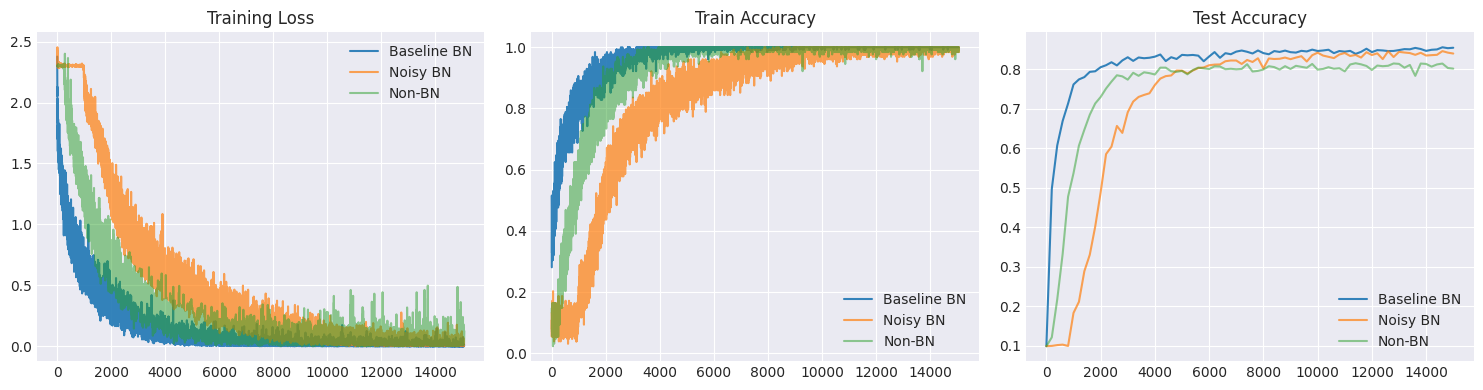

Received KeyboardInterrupt. Exiting...


In [9]:
num_epochs = 39
print_interval = 20
test_interval = 200

i = 0
baseline_train_losses, noisy_train_losses, non_train_losses = [], [], []
baseline_train_accs, noisy_train_accs, non_train_accs = [], [], []
baseline_test_accs, noisy_test_accs, non_test_accs = [], [], []

try:
    for epoch in range(num_epochs):
        for batch, labels in train_loader:
            batch = jnp.array(batch)
            labels = jnp.array(labels)

            baseline_bn.train()
            noisy_bn.train()
            non_bn.train()

            baseline_loss = step_fn(baseline_bn, baseline_opt, batch, labels)
            noisy_loss = step_fn(noisy_bn, noisy_opt, batch, labels)
            non_loss = step_fn(non_bn, non_opt, batch, labels)

            baseline_train_losses.append(baseline_loss)
            noisy_train_losses.append(noisy_loss)
            non_train_losses.append(non_loss)

            baseline_acc = accuracy(baseline_bn, batch, labels)
            noisy_acc = accuracy(noisy_bn, batch, labels)
            non_acc = accuracy(non_bn, batch, labels)

            baseline_train_accs.append(baseline_acc)
            noisy_train_accs.append(noisy_acc)
            non_train_accs.append(non_acc)

            baseline_bn.eval()
            noisy_bn.eval()
            non_bn.eval()

            if i % test_interval == 0:
                baseline_test_acc = test_accuracy(baseline_bn, test_loader)
                noisy_test_acc = test_accuracy(noisy_bn, test_loader)
                non_test_acc = test_accuracy(non_bn, test_loader)

                baseline_test_accs.append(baseline_test_acc)
                noisy_test_accs.append(noisy_test_acc)
                non_test_accs.append(non_test_acc)

            if i % print_interval == 0:
                clear_output(wait=True)
                print(f"iter: {i}")
                print(f"  Baseline BN - loss: {baseline_loss:0.4f}, test_acc: {baseline_test_acc:0.3f}")
                print(f"  Noisy BN    - loss: {noisy_loss:0.4f}, test_acc: {noisy_test_acc:0.3f}")
                print(f"  Non-BN      - loss: {non_loss:0.4f}, test_acc: {non_test_acc:0.3f}")

                fig, axes = plt.subplots(1, 3, figsize=(15, 4))
                axes[0].plot(baseline_train_losses, alpha=0.9, label='Baseline BN')
                axes[0].plot(noisy_train_losses, alpha=0.7, label='Noisy BN')
                axes[0].plot(non_train_losses, alpha=0.5, label='Non-BN')
                axes[0].set_title('Training Loss')
                axes[0].legend()
                axes[1].plot(baseline_train_accs, alpha=0.9, label='Baseline BN')
                axes[1].plot(noisy_train_accs, alpha=0.7, label='Noisy BN')
                axes[1].plot(non_train_accs, alpha=0.5, label='Non-BN')
                axes[1].set_title('Train Accuracy')
                axes[1].legend()
                x = list(range(len(baseline_test_accs)))
                x = [i * 200 for i in x]
                axes[2].plot(x, baseline_test_accs, alpha=0.9, label='Baseline BN')
                axes[2].plot(x, noisy_test_accs, alpha=0.7, label='Noisy BN')
                axes[2].plot(x, non_test_accs, alpha=0.5, label='Non-BN')
                axes[2].set_title('Test Accuracy')
                axes[2].legend()
                plt.tight_layout()
                plt.show()
            i += 1

except KeyboardInterrupt:
    print("Received KeyboardInterrupt. Exiting...")

## Results Visualization

After training completes, create comprehensive comparison visualizations.

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].plot(baseline_train_losses, alpha=0.9, label='Baseline BN')
axes[0, 0].plot(noisy_train_losses, alpha=0.7, label='Noisy BN')
axes[0, 0].plot(non_train_losses, alpha=0.5, label='Non-BN')
axes[0, 0].set_title('Training Loss Comparison')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].set_yscale('log')
axes[0, 1].plot(baseline_train_accs, alpha=0.9, label='Baseline BN')
axes[0, 1].plot(noisy_train_accs, alpha=0.7, label='Noisy BN')
axes[0, 1].plot(non_train_accs, alpha=0.5, label='Non-BN')
axes[0, 1].set_title('Train Accuracy Comparison')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
x = list(range(len(baseline_test_accs)))
x = [i * 200 for i in x]
axes[1, 0].plot(x, baseline_test_accs, 'o-', alpha=0.9, label='Baseline BN')
axes[1, 0].plot(x, noisy_test_accs, 's-', alpha=0.7, label='Noisy BN')
axes[1, 0].plot(x, non_test_accs, '^-', alpha=0.5, label='Non-BN')
axes[1, 0].set_title('Test Accuracy Comparison')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
final_accuracies = [baseline_test_accs[-1], noisy_test_accs[-1], non_test_accs[-1]]
axes[1, 1].bar(['Baseline BN', 'Noisy BN', 'Non-BN'], final_accuracies, 
                 color=['blue', 'orange', 'red'], alpha=0.7)
axes[1, 1].set_title('Final Test Accuracy')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_ylim(0, 1)
for i, v in enumerate(final_accuracies):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Analysis & Discussion

Automated analysis of results with hypothesis testing.

In [ ]:
print("="*60)
print("EXPERIMENT SUMMARY")
print("="*60)
print("\nFinal Performance:")
print(f"  Baseline BN - Test Accuracy: {baseline_test_accs[-1]:.4f}")
print(f"  Noisy BN    - Test Accuracy: {noisy_test_accs[-1]:.4f}")
print(f"  Non-BN      - Test Accuracy: {non_test_accs[-1]:.4f}")
print("\nConvergence Speed (iterations to 80% test accuracy):")
def find_convergence(accs, target=0.8):
    x = list(range(len(accs)))
    x = [i * 200 for i in x]
    for i, acc in enumerate(accs):
        if acc >= target:
            return x[i]
    return None
baseline_conv = find_convergence(baseline_test_accs)
noisy_conv = find_convergence(noisy_test_accs)
non_conv = find_convergence(non_test_accs)
print(f"  Baseline BN: {baseline_conv if baseline_conv else 'Not reached'}")
print(f"  Noisy BN:    {noisy_conv if noisy_conv else 'Not reached'}")
print(f"  Non-BN:      {non_conv if non_conv else 'Not reached'}")
print("\nKey Observation:")
diff_baseline_noisy = abs(baseline_test_accs[-1] - noisy_test_accs[-1])
diff_baseline_non = abs(baseline_test_accs[-1] - non_test_accs[-1])
print(f"  |Baseline BN - Noisy BN|: {diff_baseline_noisy:.4f}")
print(f"  |Baseline BN - Non-BN|:    {diff_baseline_non:.4f}")
if diff_baseline_noisy < 0.02:
    print("\n✓ Result supports Santurkar et al hypothesis:")
    print("  Noisy BN performance ≈ Baseline BN performance")
    print("  This suggests BN effectiveness is independent of ICS reduction")
else:
    print("\n✗ Result does NOT support Santurkar et al hypothesis:")
    print("  Noisy BN performance differs significantly from Baseline BN")
    print("  This may indicate issues with noise implementation or parameters")

## Validation & Debugging

Optional validation checks before running full training.

In [ ]:
dummy_batch = jnp.ones((4, 32, 32, 3))
baseline_out = baseline_bn(dummy_batch)
noisy_out = noisy_bn(dummy_batch)
non_out = non_bn(dummy_batch)
assert baseline_out.shape == (4, 10), f"Baseline BN output shape: {baseline_out.shape}"
assert noisy_out.shape == (4, 10), f"Noisy BN output shape: {noisy_out.shape}"
assert non_out.shape == (4, 10), f"Non-BN output shape: {non_out.shape}"
print("✓ Output shapes match")
noisy_bn.train()
noisy_out1 = noisy_bn(dummy_batch)
noisy_out2 = noisy_bn(dummy_batch)
assert not jnp.array_equal(noisy_out1, noisy_out2), "Noise not stochastic"
print("✓ Noise is stochastic (different each call)")
noisy_bn.eval()
noisy_out3 = noisy_bn(dummy_batch)
noisy_out4 = noisy_bn(dummy_batch)
assert jnp.array_equal(noisy_out3, noisy_out4), "Noise applied during eval"
print("✓ Noise disabled during evaluation")
test_batch = jnp.ones((4, 32, 32, 3))
test_labels = jnp.array([0, 1, 2, 3])
test_loss = step_fn(baseline_bn, baseline_opt, test_batch, test_labels)
assert isinstance(test_loss, (float, jnp.ndarray)), f"Loss type: {type(test_loss)}"
print("✓ Training step function works")

## Conclusion

### Summary

This experiment tests Santurkar et al (2018) hypothesis that BatchNorm's effectiveness is independent of Internal Covariate Shift (ICS) reduction.

### Key Findings

If results show **Baseline BN ≈ Noisy BN >> Non-BN**:
- Supports Santurkar et al's theory
- Suggests BN's benefits come from structural smoothing, not ICS reduction
- Demonstrates BN's adaptability (γ,β compensate for forced noise)

If results show **Baseline BN >> Noisy BN**:
- Contradicts Santurkar et al's theory
- May indicate issues with noise implementation
- Suggests ICS reduction may play a role

### Next Steps

1. **Landscape Measurements:** Add loss Lipschitzness and gradient predictiveness (as in Part 2)
2. **ICS Quantification:** Measure both distributional and gradient-based ICS to verify noise actually increases ICS
3. **Noise Ablation:** Test different noise levels and distributions
4. **Additional Controls:** Compare against other regularizers (dropout, weight decay)

### References

- Santurkar, S., Tsipras, D., Ilyas, A., & Madry, A. (2018). [How does batch normalization help optimization?](https://arxiv.org/abs/1805.11604). NeurIPS 31.
- Ioffe, S., & Szegedy, C. (2015). [Batch normalization: Accelerating deep network training by reducing internal covariate shift](https://arxiv.org/abs/1502.03167). ICML.